In [13]:
import turtle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/Users/sahiyo/PycharmProjects/Data/AirPassengersDates.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


「標準スコア」（または「Zスコア」とも呼ばれます）は、データポイントが平均からどれだけ標準偏差の何倍離れているかを示す指標です。Zスコアは、次の数式で計算されます：
[ Z = \frac{(X - \mu)}{\sigma} ]
ここで、(X) は個々のデータポイント、(\mu) は平均、(\sigma) は標準偏差です。Zスコアを計算することで、データポイントが平均からどれだけ離れているかを標準化された単位で表現することができます。

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['mean'] = df["#Passengers"].mean()
df['std'] = df["#Passengers"].std()

In [9]:
df['zscore'] = (df['#Passengers']-df['mean'])/df['std']
df['abs_zscore'] = abs(df['zscore'])

In [10]:
df.head()

,Date,#Passengers,mean,std,zcode,zscore,abs_zscore
0,1949-01-12,112,280.298611,119.966317,-1.402882,-1.402882,1.402882
1,1949-02-24,118,280.298611,119.966317,-1.352868,-1.352868,1.352868
2,1949-03-22,132,280.298611,119.966317,-1.236169,-1.236169,1.236169
3,1949-04-05,129,280.298611,119.966317,-1.261176,-1.261176,1.261176
4,1949-05-24,121,280.298611,119.966317,-1.327861,-1.327861,1.327861


In [19]:
df_high = df.sort_values(by='zscore', ascending=False).head(10)
df_high.head()

,Date,#Passengers,mean,std,zcode,zscore,abs_zscore
138,1960-07-02,622,280.298611,119.966317,2.848311,2.848311,2.848311
139,1960-08-16,606,280.298611,119.966317,2.714940,2.714940,2.714940
127,1959-08-01,559,280.298611,119.966317,2.323164,2.323164,2.323164
126,1959-07-29,548,280.298611,119.966317,2.231471,2.231471,2.231471
137,1960-06-02,535,280.298611,119.966317,2.123108,2.123108,2.123108


# こうやってソートするんか知らんかったな。

In [21]:
df_low = df.sort_values(by='zscore', ascending=True).head(10)
df_low.head()

,Date,#Passengers,mean,std,zcode,zscore,abs_zscore
10,1949-11-16,104,280.298611,119.966317,-1.469568,-1.469568,1.469568
0,1949-01-12,112,280.298611,119.966317,-1.402882,-1.402882,1.402882
22,1950-11-19,114,280.298611,119.966317,-1.386211,-1.386211,1.386211
12,1950-01-15,115,280.298611,119.966317,-1.377875,-1.377875,1.377875
1,1949-02-24,118,280.298611,119.966317,-1.352868,-1.352868,1.352868


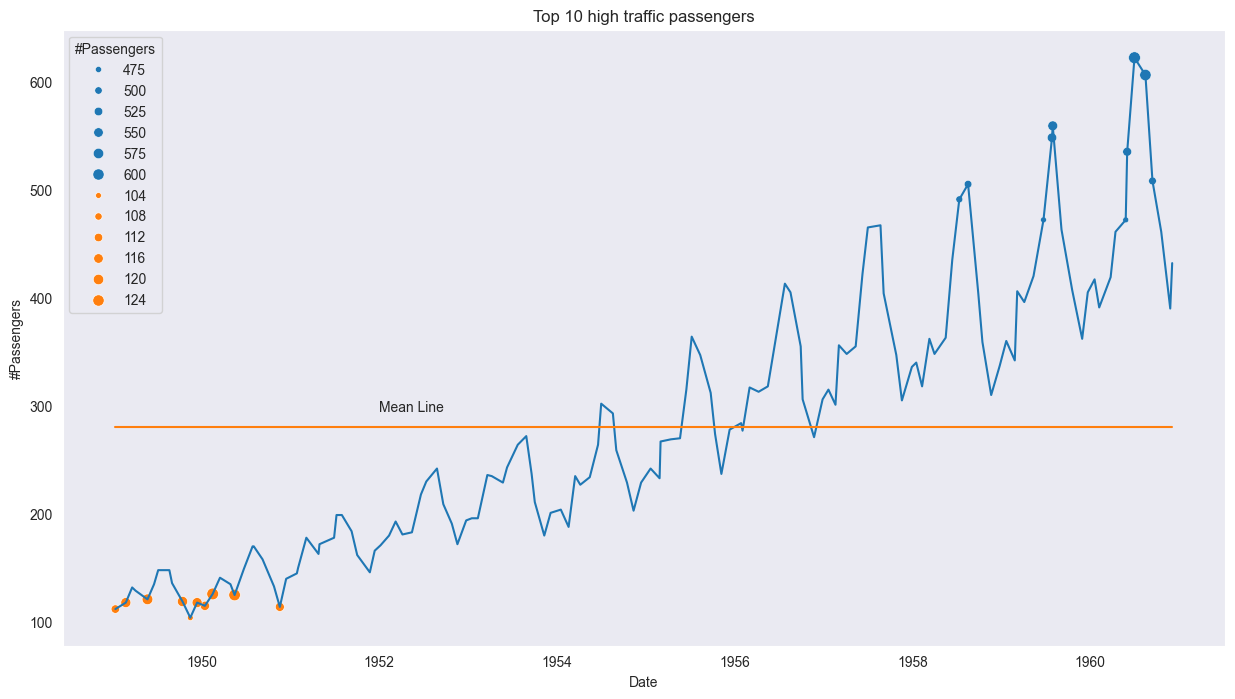

In [32]:
plt.figure(figsize=(15,8))
plt.grid = True

plt.title('Top 10 high traffic passengers')

ax = sns.lineplot(data= df, x='Date', y='#Passengers')
ax= sns.scatterplot(data= df_high, x='Date', y='#Passengers',size='#Passengers')
ax= sns.lineplot(data= df, x='Date', y='mean') # it's changed automatically.
ax.text(pd.to_datetime('1952'),295,'Mean Line') # text（x軸、y軸、表示したい文字）
ax= sns.scatterplot(data= df_low, x='Date', y='#Passengers',size='#Passengers')
ax.grid()